We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [1]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2021-06-02 11:34:53--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:5400:1d:d83a:40c0:93a1, 2600:9000:21c7:f200:1d:d83a:40c0:93a1, 2600:9000:21c7:4a00:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:5400:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [2]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [3]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

dateRep  day  month  year  cases  deaths countriesAndTerritories geoId  \
0 2020-12-14   14     12  2020    746       6             Afghanistan    AF   
1 2020-12-13   13     12  2020    298       9             Afghanistan    AF   
2 2020-12-12   12     12  2020    113      11             Afghanistan    AF   
3 2020-12-11   11     12  2020     63      10             Afghanistan    AF   
4 2020-12-10   10     12  2020    202      16             Afghanistan    AF   
5 2020-12-09    9     12  2020    135      13             Afghanistan    AF   
6 2020-12-08    8     12  2020    200       6             Afghanistan    AF   
7 2020-12-07    7     12  2020    210      26             Afghanistan    AF   
8 2020-12-06    6     12  2020    234      10             Afghanistan    AF   
9 2020-12-05    5     12  2020    235      18             Afghanistan    AF   

  countryterritoryCode  popData2019 continentExp  \
0                  AFG   38041757.0         Asia   
1                  AFG   38041757.0         Asia   
2                  AFG   38041757.0         Asia   
3                  AFG   38041757.0         Asia   
4                  AFG   38041757.0         Asia   
5                  AFG   38041757.0         Asia   
6                  AFG   38041757.0         Asia   
7                  AFG   38041757.0         Asia   
8                  AFG   38041757.0         Asia   
9                  AFG   38041757.0         Asia   

   Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
0                                           9.013779           
1                                           7.052776           
2                                           6.868768           
3                                           7.134266           
4                                           6.968658           
5                                           6.963401           
6                                           7.094835           
7                                           7.215755           
8                                           7.326160           
9                                           7.115865

Last check of our source dataframe.

In [4]:
df.count()

dateRep                                                       61900
day                                                           61900
month                                                         61900
year                                                          61900
cases                                                         61900
deaths                                                        61900
countriesAndTerritories                                       61900
geoId                                                         61900
countryterritoryCode                                          61777
popData2019                                                   61777
continentExp                                                  61900
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    59021
dtype: int64

We pivot to a country by column format.

In [5]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         \
geoId         AD      AE     AF   AG   AI     AL      AM     AO      AR   
dateRep                                                                   
2019-12-31   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-01   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-02   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-03   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
2020-01-04   NaN     0.0    0.0  NaN  NaN    NaN     0.0    NaN     NaN   
...          ...     ...    ...  ...  ...    ...     ...    ...     ...   
2020-12-10  35.0  1313.0  202.0  0.0  0.0  752.0  1174.0   75.0  5303.0   
2020-12-11  28.0  1255.0   63.0  0.0  0.0  873.0  1077.0  121.0  6994.0   
2020-12-12  46.0  1196.0  113.0  1.0  0.0  802.0   995.0  136.0  7112.0   
2020-12-13  52.0  1154.0  298.0  1.0  0.0  879.0  1013.0  100.0  5274.0   
2020-12-14  50.0  1194.0  746.0  0.0  0.0  788.0   357.0   27.0  3558.0   

                    ... deaths                                                  
geoId           AT  ...     VG   VI   VN   VU   WF    XK   YE     ZA   ZM   ZW  
dateRep             ...                                                         
2019-12-31     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-01     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-02     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-03     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
2020-01-04     0.0  ...    NaN  NaN  0.0  NaN  NaN   NaN  NaN    NaN  NaN  NaN  
...            ...  ...    ...  ...  ...  ...  ...   ...  ...    ...  ...  ...  
2020-12-10  2913.0  ...    0.0  0.0  0.0  0.0  0.0  11.0  0.0  142.0  0.0  1.0  
2020-12-11  2466.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  173.0  0.0  1.0  
2020-12-12  3026.0  ...    0.0  0.0  0.0  0.0  0.0  13.0  0.0  205.0  1.0  1.0  
2020-12-13  2938.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  154.0  1.0  1.0  
2020-12-14  3005.0  ...    0.0  0.0  0.0  0.0  0.0  12.0  0.0  170.0  1.0  0.0  

[350 rows x 428 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add three months and check our latest date.

In [6]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.min() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths           \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VG  VI   VN   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN  0.0   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ...   
2020-12-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2020-12-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2020-12-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2020-12-29   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   
2020-12-30   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN  NaN   

                                        
geoId       VU  WF  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN NaN NaN NaN NaN NaN NaN  
2020-01-01 NaN NaN NaN NaN NaN NaN NaN  
2020-01-02 NaN NaN NaN NaN NaN NaN NaN  
2020-01-03 NaN NaN NaN NaN NaN NaN NaN  
2020-01-04 NaN NaN NaN NaN NaN NaN NaN  
...         ..  ..  ..  ..  ..  ..  ..  
2020-12-26 NaN NaN NaN NaN NaN NaN NaN  
2020-12-27 NaN NaN NaN NaN NaN NaN NaN  
2020-12-28 NaN NaN NaN NaN NaN NaN NaN  
2020-12-29 NaN NaN NaN NaN NaN NaN NaN  
2020-12-30 NaN NaN NaN NaN NaN NaN NaN  

[366 rows x 428 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since January 1st, 2019. To access the date values in the index easily, we first create a separate column.

In [7]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    366.000000
mean     182.500000
std      105.799338
min        0.000000
25%       91.250000
50%      182.500000
75%      273.750000
max      365.000000
Name: daynum, dtype: float64

Let's start with __IT__, because Italy is already showing a longer tail in the case data. We create a simple dataframe to contain the source values for our fitting algorithm and then expand the data into a one-dimensional vector by repeating the x values by the number of cases for that day. Now the histogram of that data should be our original curve.

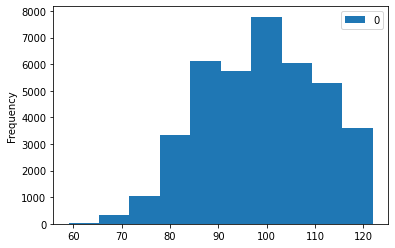

In [8]:
country = 'NL'
measure = 'cases'
pmeasure = 'pcases'

df_pred = pd.DataFrame({'x':df_geo['daynum'], 'y':df_geo[measure][country].loc[:'20200501']})
df_pred = df_pred[df_pred['y'] > 0]
ft_data = np.array(df_pred.astype(int))
xp_data = np.repeat(ft_data[:, 0], ft_data[:, 1])
pd.DataFrame(xp_data).plot(kind='hist')

Now we can use statistical fitting to estimate the curve. From various epidemiological papers the gamma function seems to be a good approximation. It is available in the `scipy` package. A Gamma distribution is described by three parameters and we can use `stats` to get the 4 moments of the distribution.

In [9]:
import scipy.stats as stats

alpha, loc, scale = stats.gamma.fit(xp_data)
print(alpha, loc, scale, len(xp_data))

mean, var, skew, kurt = stats.gamma.stats(alpha, loc, scale, 'mvsk')
print(mean, var, skew, kurt)

456.07823489096745 -160.1923867652041 0.5681214550416216 39316
98.91544365386682 147.2047176303603 0.09365054779614665 0.013155637653777521


The `pdf` function takes the results of `fit` and applies them to input data.

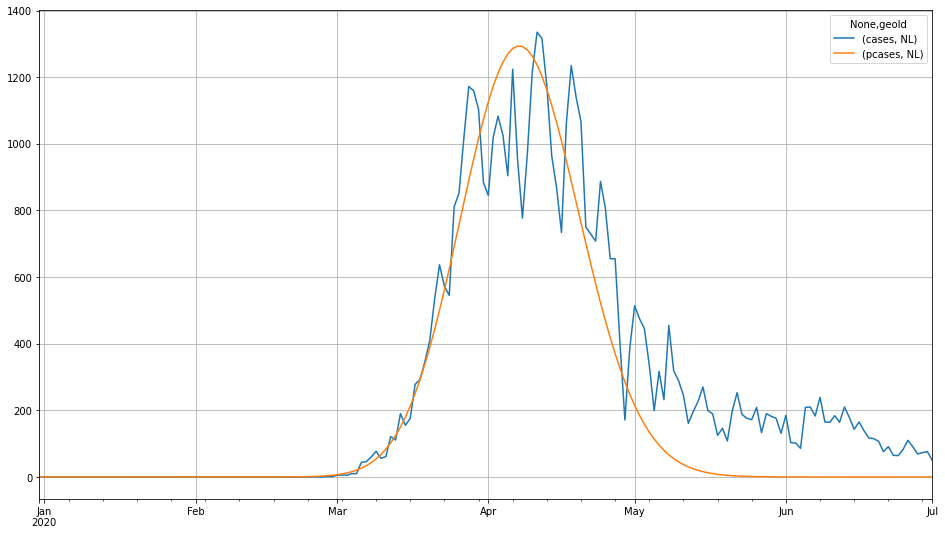

In [13]:
df_geo[(pmeasure, country)] = stats.gamma.pdf(df_geo['daynum'], alpha, loc, scale) * len(xp_data)
df_geo[[(measure, country), (pmeasure, country)]].plot(figsize=(16, 9), grid=True)

Now that we have a curve fitted, we can see where the cumulative number will end up if none of our assumptions change, which is rarely the case.

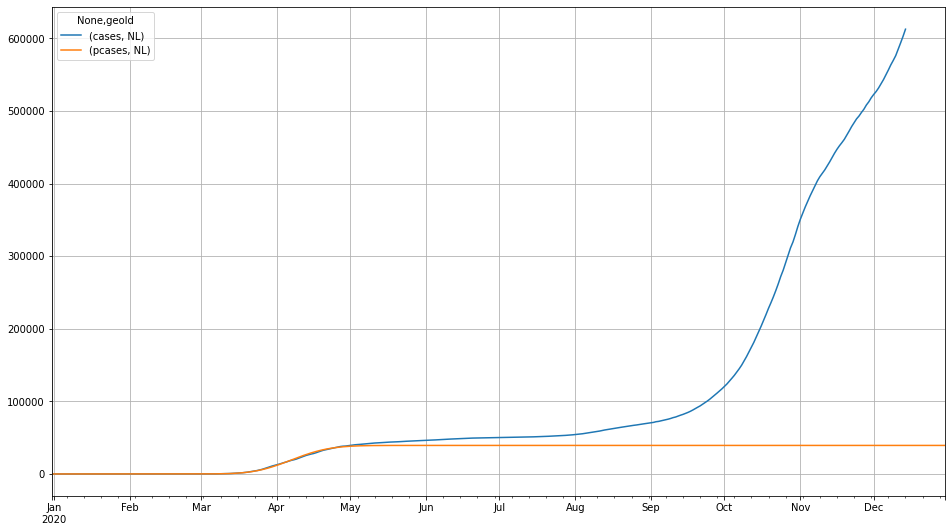

In [11]:
df_geo[[(measure, country), (pmeasure, country)]].cumsum().plot(figsize=(16, 9), grid=True)

Keep exploring! Stay home, wash your hands, keep your distance.